In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import statistics as st

from scipy.spatial import distance
from math import sin, cos, sqrt, atan2, radians
import time

#import shapely
from shapely.geometry import shape, Point, box
import shapely.wkt

#import six

import random

In [2]:
permits = pd.read_csv('data/perms_w_features_for_eda.csv')

In [175]:
#I'm creating a dictionary of important variables to help me keep track of them
variables = {}

In [176]:
variables['permits'] = ['dataframe', 'data on permits']

# Confirming the Data Set Looks as Expected

In [3]:
permits.head()

,borough,bin_no,house_no,street_name,job_no,zip_code,job_start_date,owners_business_type,non-profit,latitude,...,popu18_20p,hsp_20p,wnh_20p,bnh_20p,anh_20p,onh_20p,nh2pl_20p,hunits_20,ochu_20p,vachu_20p
0,MANHATTAN,1056547,2686,BROADWAY,121207354,10025,2022-05-11,PARTNERSHIP,N,40.798817,...,0.129,0.159,0.614,0.081,0.099,0.008,0.040,4951,0.924,0.076
1,MANHATTAN,1812187,140,HILLSIDE AVENUE,121189524,10040,2022-05-11,CORPORATION,N,40.860296,...,0.153,0.673,0.189,0.066,0.041,0.009,0.022,3517,0.957,0.043
2,MANHATTAN,1091669,37,HILLSIDE AVENUE,121205445,10040,2021-02-19,PARTNERSHIP,N,40.858508,...,0.153,0.673,0.189,0.066,0.041,0.009,0.022,3517,0.957,0.043
3,BRONX,2823631,368,EAST 152 STREET,220586168,10455,2022-05-11,INDIVIDUAL,N,40.818565,...,0.264,0.710,0.017,0.245,0.008,0.010,0.011,2439,0.970,0.030
4,BRONX,2129278,418,EAST 153 STREET,220593463,10455,2018-02-09,CORPORATION,N,40.818742,...,0.264,0.710,0.017,0.245,0.008,0.010,0.011,2439,0.970,0.030


In [4]:
permits.shape

(7177, 45)

In [5]:
permits.columns

Index(['borough', 'bin_no', 'house_no', 'street_name', 'job_no', 'zip_code',
       'job_start_date', 'owners_business_type', 'non-profit', 'latitude',
       'longitude', 'point', 'in_nyc', 'in_borough', 'bct2020',
       'total_complaints', 'closest_subway', 'closest_subway_line',
       'subway_count_tenth_mi', 'subway_count_half_mi', 'subway_count_one_mi',
       'subway_count_two_five_mi', 'hist_dist_name', 'in_hist_dist',
       'closest_park', 'name_closest_park', 'park_count_tenth_mi',
       'park_count_half_mi', 'park_count_one_mi', 'park_count_two_five_mi',
       'pop_20', 'hhpop_20p', 'gq_20p', 'instgq_20p', 'avhhsz_20',
       'popu18_20p', 'hsp_20p', 'wnh_20p', 'bnh_20p', 'anh_20p', 'onh_20p',
       'nh2pl_20p', 'hunits_20', 'ochu_20p', 'vachu_20p'],
      dtype='object')

In [6]:
permits.drop(columns = ['in_borough', 'in_nyc'], inplace = True)

In [7]:
permits.shape

(7177, 43)

In [8]:
permits.dtypes

borough                      object
bin_no                        int64
house_no                     object
street_name                  object
job_no                        int64
zip_code                      int64
job_start_date               object
owners_business_type         object
non-profit                   object
latitude                    float64
longitude                   float64
point                        object
bct2020                       int64
total_complaints              int64
closest_subway              float64
closest_subway_line          object
subway_count_tenth_mi         int64
subway_count_half_mi          int64
subway_count_one_mi           int64
subway_count_two_five_mi      int64
hist_dist_name               object
in_hist_dist                  int64
closest_park                float64
name_closest_park            object
park_count_tenth_mi           int64
park_count_half_mi            int64
park_count_one_mi             int64
park_count_two_five_mi      

# Looking at Describe

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
permits.describe()

,bin_no,job_no,zip_code,latitude,longitude,bct2020,total_complaints,closest_subway,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,in_hist_dist,closest_park,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,pop_20,hhpop_20p,gq_20p,instgq_20p,avhhsz_20,popu18_20p,hsp_20p,wnh_20p,bnh_20p,anh_20p,onh_20p,nh2pl_20p,hunits_20,ochu_20p,vachu_20p
count,7.177000e+03,7.177000e+03,7177.000000,7177.000000,7177.000000,7.177000e+03,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000
mean,3.935469e+06,3.855671e+08,10923.168455,40.674872,-73.960083,3.680677e+06,349.701129,0.852570,0.223074,5.225303,18.084018,94.559565,0.005852,0.152357,0.724119,9.782500,30.866518,145.793368,4408.716734,0.980759,0.019242,0.005121,2.772844,0.206467,0.240463,0.390556,0.182185,0.141460,0.014372,0.030942,1738.906089,0.930128,0.069872
std,1.124590e+06,1.100074e+08,1167.560297,0.094704,0.129389,1.092574e+06,442.656956,1.033604,0.914538,8.197947,23.615700,104.669143,0.076280,0.199300,1.089741,9.209166,27.723839,115.417194,1687.414259,0.039864,0.039864,0.020297,0.473152,0.062246,0.190783,0.306871,0.238657,0.166746,0.019354,0.018732,795.938772,0.045250,0.045250
min,1.002657e+06,1.101465e+08,10001.000000,40.499212,-74.254845,1.000600e+06,0.000000,0.004600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,44.000000,0.301000,0.000000,0.000000,1.480000,0.038000,0.012000,0.003000,0.000000,0.001000,0.000000,0.003000,7.000000,0.676000,0.000000
25%,3.326359e+06,3.211949e+08,10312.000000,40.598427,-74.071815,3.036502e+06,64.000000,0.196112,0.000000,0.000000,0.000000,15.000000,0.000000,0.056600,0.000000,4.000000,12.000000,49.000000,3134.000000,0.980000,0.000000,0.000000,2.500000,0.172000,0.109000,0.074000,0.013000,0.035000,0.006000,0.017000,1153.000000,0.923000,0.049000
50%,4.163375e+06,4.210740e+08,11210.000000,40.673299,-73.939770,4.025402e+06,182.000000,0.412733,0.000000,2.000000,10.000000,63.000000,0.000000,0.108817,0.000000,6.000000,19.000000,95.000000,4357.000000,0.996000,0.004000,0.000000,2.770000,0.201000,0.166000,0.352000,0.042000,0.077000,0.010000,0.024000,1666.000000,0.941000,0.059000
75%,5.054101e+06,5.201383e+08,11355.000000,40.745155,-73.868732,5.002002e+06,472.000000,1.009359,0.000000,8.000000,29.000000,154.000000,0.000000,0.183377,1.000000,12.000000,39.000000,235.000000,5597.000000,1.000000,0.020000,0.000000,3.020000,0.233000,0.311000,0.671000,0.304000,0.190000,0.015000,0.042000,2192.000000,0.951000,0.077000
max,5.863658e+06,5.401977e+08,99999.000000,40.909605,-73.700772,5.032300e+06,4942.000000,5.331561,16.000000,96.000000,217.000000,556.000000,1.000000,1.517895,13.000000,65.000000,132.000000,422.000000,13385.000000,1.000000,0.699000,0.299000,5.120000,0.566000,0.912000,0.945000,0.891000,0.874000,0.287000,0.144000,8067.000000,1.000000,0.324000


# **NOTE COME BACK AND LOOK AT THE OTHER OUTLIERS**

# Criminal Complaints

[This site](https://datagy.io/seaborn-boxplot/) gave me the idea to set_style and set_palette and suggested this style/palette combination.

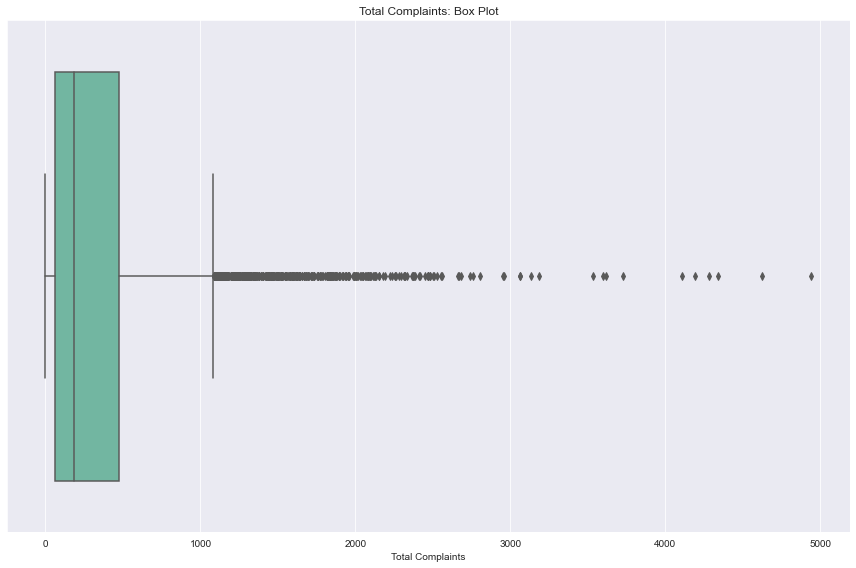

In [11]:
plt.figure(figsize = (12, 8))

sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.boxplot(x = permits['total_complaints'])

plt.title('Total Complaints: Box Plot')
plt.xlabel('Total Complaints')

plt.tight_layout()
plt.savefig('images/total_complaints_boxplot.png');

In [14]:
q1 = np.percentile(permits['total_complaints'], 25)
median = np.percentile(permits['total_complaints'], 50)
q3 = np.percentile(permits['total_complaints'], 75)
iqr = q3-q1
max_ = q3+1.5*iqr
if q1-1.5*iqr >= 0:
    min_ = q1-1.5*iqr
else:
    min_ = 0
outliers_high = len(permits[permits['total_complaints']>max_])
outliers_low = len(permits[permits['total_complaints']<min_])

print("Total Complaints Median:", median)
print("Total Complaints First Quartile:", q1)
print("Total Complaints Third Quartile:", q3)
print("Total Complaints Interquartile Range:", iqr)
print("Total Complaints 'Maximum':", max_)
print("Total Complaints 'Minimum':", min_)
print("")
print(f"In Total Complaints, there are {outliers_high} outliers above the maximum. That is {round((outliers_high/permits.shape[0])*100, 2)}% of the data")
print(f"In Total Complaintes, there are {outliers_low} outliers below the minimum. That is {round((outliers_low/permits.shape[0])*100, 2)}% of the data")

Total Complaints Median: 182.0
Total Complaints First Quartile: 64.0
Total Complaints Third Quartile: 472.0
Total Complaints Interquartile Range: 408.0
Total Complaints 'Maximum': 1084.0
Total Complaints 'Minimum': 0

In Total Complaints, there are 468 outliers above the maximum. That is 6.52% of the data
In Total Complaintes, there are 0 outliers below the minimum. That is 0.0% of the data


## Looking at the Outlier Complaints with Describe

In [15]:
permits[permits['total_complaints']>max_].describe()

,bin_no,job_no,zip_code,latitude,longitude,bct2020,total_complaints,closest_subway,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,in_hist_dist,closest_park,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,pop_20,hhpop_20p,gq_20p,instgq_20p,avhhsz_20,popu18_20p,hsp_20p,wnh_20p,bnh_20p,anh_20p,onh_20p,nh2pl_20p,hunits_20,ochu_20p,vachu_20p
count,4.680000e+02,4.680000e+02,468.000000,468.000000,468.000000,4.680000e+02,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000
mean,2.392268e+06,2.385163e+08,10599.290598,40.756304,-73.935578,2.205406e+06,1620.350427,0.198441,1.047009,15.023504,47.946581,223.032051,0.017094,0.083284,1.472222,22.709402,72.829060,290.905983,5146.311966,0.964310,0.035690,0.003442,2.487115,0.199699,0.372767,0.207694,0.284838,0.090955,0.011600,0.032205,2251.961538,0.933058,0.066942
std,1.143107e+06,1.020213e+08,518.940401,0.080529,0.054321,1.033125e+06,562.926657,0.168880,1.946262,15.015249,37.929656,128.245970,0.129761,0.065307,1.598071,12.535387,32.323125,92.955239,2097.676288,0.048566,0.048566,0.014750,0.446755,0.070398,0.240761,0.233695,0.211246,0.132781,0.005109,0.016602,1196.140264,0.035127,0.035127
min,1.002657e+06,1.101465e+08,10001.000000,40.512208,-74.249418,1.000600e+06,1087.000000,0.004600,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,2.000000,5.000000,13.000000,1093.000000,0.501000,0.000000,0.000000,1.480000,0.038000,0.044000,0.007000,0.007000,0.001000,0.003000,0.005000,360.000000,0.747000,0.009000
25%,1.091602e+06,1.227361e+08,10031.000000,40.689659,-73.956883,1.022200e+06,1233.000000,0.081142,0.000000,7.000000,28.000000,152.750000,0.000000,0.037774,0.000000,13.000000,51.750000,257.000000,3570.000000,0.947000,0.005000,0.000000,2.180000,0.149750,0.142500,0.022000,0.088000,0.014000,0.009000,0.017000,1488.000000,0.914000,0.040000
50%,2.129269e+06,2.205797e+08,10457.000000,40.769019,-73.935479,2.023200e+06,1466.000000,0.149272,0.000000,12.000000,38.000000,200.000000,0.000000,0.068202,1.000000,23.000000,78.000000,314.500000,4826.500000,0.980000,0.020000,0.000000,2.530000,0.204000,0.320500,0.105000,0.263000,0.045000,0.011000,0.032000,1948.000000,0.939000,0.061000
75%,3.421365e+06,3.212672e+08,11213.000000,40.824338,-73.906065,3.035475e+06,1832.250000,0.249347,2.000000,17.000000,53.000000,237.000000,0.000000,0.109028,2.000000,31.000000,97.250000,349.000000,6378.500000,0.995000,0.053000,0.000000,2.800000,0.259000,0.618000,0.292250,0.440000,0.100000,0.013000,0.044000,2594.000000,0.960000,0.086000
max,5.174556e+06,5.203858e+08,11693.000000,40.884601,-73.749014,5.024800e+06,4942.000000,1.067705,12.000000,96.000000,210.000000,551.000000,1.000000,0.321175,13.000000,64.000000,132.000000,422.000000,13385.000000,1.000000,0.499000,0.178000,4.760000,0.518000,0.893000,0.868000,0.787000,0.874000,0.065000,0.080000,8067.000000,0.991000,0.253000


In [16]:
permits[permits['total_complaints']>max_]['borough'].value_counts(normalize = True)

BRONX            0.318376
MANHATTAN        0.309829
BROOKLYN         0.277778
QUEENS           0.072650
STATEN ISLAND    0.021368
Name: borough, dtype: float64

[This site](https://stackoverflow.com/questions/35523635/extract-values-in-pandas-value-counts) reminded me how to extract the keys and values from `value_counts`

In [17]:
values = permits[permits['total_complaints']>max_]['borough'].value_counts(normalize = True).to_list()
keys = permits[permits['total_complaints']>max_]['borough'].value_counts(normalize = True).keys().to_list()

In [18]:
hi_complaints_boro = dict(zip(keys, values))

In [19]:
hi_complaints_boro

{'BRONX': 0.31837606837606836,
 'MANHATTAN': 0.30982905982905984,
 'BROOKLYN': 0.2777777777777778,
 'QUEENS': 0.07264957264957266,
 'STATEN ISLAND': 0.021367521367521368}

In [179]:
variables['hi_complaints_boro'] = ['dictinoary', 'the number of high outlier complaints per borough.']

# Building a Data Frame With Significant Details for Permits

In [20]:
permits['borough'].value_counts(normalize = True)

BROOKLYN         0.305977
QUEENS           0.288979
STATEN ISLAND    0.264177
BRONX            0.101853
MANHATTAN        0.039014
Name: borough, dtype: float64

In [80]:
boroughs = pd.DataFrame(permits['borough'].value_counts(normalize = True))

In [81]:
boroughs

,borough
BROOKLYN,0.305977
QUEENS,0.288979
STATEN ISLAND,0.264177
BRONX,0.101853
MANHATTAN,0.039014


In [181]:
variables['boroughs'] = ['dataframe', 'observations about the boroughs and features in the "permits" data set']

In [82]:
boroughs.reset_index(inplace = True)

In [83]:
boroughs.rename(columns = {'borough': 'percent_of_tot_permits'}, inplace = True)

In [84]:
boroughs.rename(columns = {'index': 'borough'}, inplace = True)

In [85]:
boroughs.shape

(5, 2)

In [86]:
boroughs

,borough,percent_of_tot_permits
0,BROOKLYN,0.305977
1,QUEENS,0.288979
2,STATEN ISLAND,0.264177
3,BRONX,0.101853
4,MANHATTAN,0.039014


## Outlier Complaints
Manhattan has 694% more high-complaint permits sites as it's proportion of total permits. The Bronx has 213% more of the high complaint permits than it's proportion of the total permits. Staten Island has the lowest proportion compared to it's proportion of the permits, at 92% less than expected.

The question ** TO BE VISITED LATER, IF POSSIBLE ** is how crime rates in these borough relate to each other. If Manhattan has ~700% more crime (which I'm almost certain it doesn't), then these numbers would be as expected.

In [87]:
for i in boroughs.index:
    boro = boroughs.loc[i, 'borough']
    boroughs.loc[i, 'percent_of_tot_outlier_complaints'] = hi_complaints_boro[boro]

boroughs

,borough,percent_of_tot_permits,percent_of_tot_outlier_complaints
0,BROOKLYN,0.305977,0.277778
1,QUEENS,0.288979,0.072650
2,STATEN ISLAND,0.264177,0.021368
3,BRONX,0.101853,0.318376
4,MANHATTAN,0.039014,0.309829


In [88]:
boroughs['complaints_percent_diff'] = (boroughs['percent_of_tot_outlier_complaints']-boroughs['percent_of_tot_permits'])/(boroughs['percent_of_tot_permits'])

In [89]:
boroughs

,borough,percent_of_tot_permits,percent_of_tot_outlier_complaints,complaints_percent_diff
0,BROOKLYN,0.305977,0.277778,-0.092163
1,QUEENS,0.288979,0.072650,-0.748599
2,STATEN ISLAND,0.264177,0.021368,-0.919117
3,BRONX,0.101853,0.318376,2.125835
4,MANHATTAN,0.039014,0.309829,6.941583


In [90]:
high_complaints = permits[permits['total_complaints']>max_]

In [188]:
variables['high_complaints'] = ['dataframe', 'collection of data on the outlier (high) complaint count permits']

In [91]:
high_complaints.shape

(468, 43)

In [92]:
high_complaints['closest_park'].mean()

0.0832837533567232

In [93]:
permits['closest_park'].mean()

0.1523573087510188

**The mean closest park for high complaint permit sites is about 50% closer than the mean closest park for the whole dataset.**

# FILL IN BOROUGH CRIME DATA HERE

# Exploring Closest Parks

In [94]:
permits.groupby('borough')['closest_park'].mean()

borough
BRONX            0.102130
BROOKLYN         0.115663
MANHATTAN        0.076853
QUEENS           0.216910
STATEN ISLAND    0.154760
Name: closest_park, dtype: float64

In [95]:
keys = permits.groupby('borough')['closest_park'].mean().keys().to_list()
values = permits.groupby('borough')['closest_park'].mean().to_list()

parks_borough = dict(zip(keys, values))
parks_borough

{'BRONX': 0.10213015626656506,
 'BROOKLYN': 0.1156631915352072,
 'MANHATTAN': 0.07685265069163472,
 'QUEENS': 0.2169103592494226,
 'STATEN ISLAND': 0.15475952784120584}

In [189]:
variables['parks_borough'] = ['dictionary', 'contains mean closest park to permits by borough']

In [96]:
for i in boroughs.index:
    boro = boroughs.loc[i, 'borough']
    boroughs.loc[i, 'closest_park_mean'] = parks_borough[boro]
boroughs

,borough,percent_of_tot_permits,percent_of_tot_outlier_complaints,complaints_percent_diff,closest_park_mean
0,BROOKLYN,0.305977,0.277778,-0.092163,0.115663
1,QUEENS,0.288979,0.072650,-0.748599,0.216910
2,STATEN ISLAND,0.264177,0.021368,-0.919117,0.154760
3,BRONX,0.101853,0.318376,2.125835,0.102130
4,MANHATTAN,0.039014,0.309829,6.941583,0.076853


## Bringing In Borough Area

In [97]:
borough_bounds = pd.read_csv('../capstone_large_data_sets/nybb.csv')
borough_bounds.head()

,the_geom,BoroCode,BoroName,Shape_Leng,Shape_Area
0,MULTIPOLYGON (((-73.82644661516991 40.59052744...,4,Queens,900269.280485,3.040206e+09
1,MULTIPOLYGON (((-73.86327471071958 40.58387684...,3,Brooklyn,728477.954082,1.934167e+09
2,MULTIPOLYGON (((-74.05050806403247 40.56642203...,5,Staten Island,325924.002076,1.623631e+09
3,MULTIPOLYGON (((-74.01092841268031 40.68449147...,1,Manhattan,359993.126318,6.366208e+08
4,MULTIPOLYGON (((-73.89680883223778 40.79580844...,2,Bronx,463868.599917,1.187194e+09


In [190]:
variables['borough_bounds'] = ['dataframe', 'contains boundary and area data for each borough']

In [98]:
borough_bounds.columns = borough_bounds.columns.str.lower()

In [99]:
borough_bounds['boroname'] = borough_bounds['boroname'].str.upper()

In [100]:
borough_bounds.rename(columns = {'boroname': 'borough'}, inplace = True)

In [101]:
borough_bounds

,the_geom,borocode,borough,shape_leng,shape_area
0,MULTIPOLYGON (((-73.82644661516991 40.59052744...,4,QUEENS,900269.280485,3.040206e+09
1,MULTIPOLYGON (((-73.86327471071958 40.58387684...,3,BROOKLYN,728477.954082,1.934167e+09
2,MULTIPOLYGON (((-74.05050806403247 40.56642203...,5,STATEN ISLAND,325924.002076,1.623631e+09
3,MULTIPOLYGON (((-74.01092841268031 40.68449147...,1,MANHATTAN,359993.126318,6.366208e+08
4,MULTIPOLYGON (((-73.89680883223778 40.79580844...,2,BRONX,463868.599917,1.187194e+09


### The Shape Area Is Included, But Not in Degrees Squared
Because the park data doesn't include area, I need to work calculate both to so they're in the same scale, degrees squared.

In [102]:
def shape_list(multipolygons):
    shape_list = []
    for i in range(0, len(multipolygons)):
        name = f'shape{i}'
        name = shapely.wkt.loads(multipolygons[i])
        shape_list.append(name)
    return shape_list

In [103]:
borough_shapes = shape_list(borough_bounds['the_geom'])

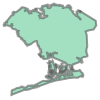

In [104]:
borough_shapes[0]

In [105]:
borough_bounds['area_degsq'] = 0

In [106]:
for i in borough_bounds.index:
    borough_bounds.loc[i,'area_degsq'] = borough_shapes[i].area

In [107]:
borough_bounds

,the_geom,borocode,borough,shape_leng,shape_area,area_degsq
0,MULTIPOLYGON (((-73.82644661516991 40.59052744...,4,QUEENS,900269.280485,3.040206e+09,0.030098
1,MULTIPOLYGON (((-73.86327471071958 40.58387684...,3,BROOKLYN,728477.954082,1.934167e+09,0.019130
2,MULTIPOLYGON (((-74.05050806403247 40.56642203...,5,STATEN ISLAND,325924.002076,1.623631e+09,0.016044
3,MULTIPOLYGON (((-74.01092841268031 40.68449147...,1,MANHATTAN,359993.126318,6.366208e+08,0.006309
4,MULTIPOLYGON (((-73.89680883223778 40.79580844...,2,BRONX,463868.599917,1.187194e+09,0.011779


Queens has the most area, Manhattan the least.

In [108]:
borough_bounds.sort_values('area_degsq', ascending = False)

,the_geom,borocode,borough,shape_leng,shape_area,area_degsq
0,MULTIPOLYGON (((-73.82644661516991 40.59052744...,4,QUEENS,900269.280485,3.040206e+09,0.030098
1,MULTIPOLYGON (((-73.86327471071958 40.58387684...,3,BROOKLYN,728477.954082,1.934167e+09,0.019130
2,MULTIPOLYGON (((-74.05050806403247 40.56642203...,5,STATEN ISLAND,325924.002076,1.623631e+09,0.016044
4,MULTIPOLYGON (((-73.89680883223778 40.79580844...,2,BRONX,463868.599917,1.187194e+09,0.011779
3,MULTIPOLYGON (((-74.01092841268031 40.68449147...,1,MANHATTAN,359993.126318,6.366208e+08,0.006309


In [109]:
boroughs

,borough,percent_of_tot_permits,percent_of_tot_outlier_complaints,complaints_percent_diff,closest_park_mean
0,BROOKLYN,0.305977,0.277778,-0.092163,0.115663
1,QUEENS,0.288979,0.072650,-0.748599,0.216910
2,STATEN ISLAND,0.264177,0.021368,-0.919117,0.154760
3,BRONX,0.101853,0.318376,2.125835,0.102130
4,MANHATTAN,0.039014,0.309829,6.941583,0.076853


## Bringing In Parks Data

In [110]:
parks = pd.read_csv('data/parks.csv')

In [191]:
variables['parks'] = ['dataframe', 'contains boundaries of parks and addl park data']

In [111]:
parks.head()

,address,borough,name311,objectid,zipcode,multipolygon
0,132 ALTAMONT STREET,STATEN ISLAND,High Rock Park,69247,1030410306,MULTIPOLYGON (((-74.12362180687407 40.58475747...
1,2539 PITKIN AVENUE,BROOKLYN,Manley's Pl,5274,11208,MULTIPOLYGON (((-73.87857041022092 40.67475246...
2,none,QUEENS,Park,6413,11414,MULTIPOLYGON (((-73.8471858043584 40.669606352...
3,225 JORALEMON STREET,BROOKLYN,Columbus Park,5062,11201,MULTIPOLYGON (((-73.98911885717008 40.69492270...
4,400 EAST 188 STREET,BRONX,Webster Playground,4764,10458,MULTIPOLYGON (((-73.89239779472493 40.85937697...


### Number of Parks
Brooklyn has the most parks. Staten Island has the least.

In [112]:
parks['borough'].value_counts()

BROOKLYN         614
QUEENS           477
BRONX            393
MANHATTAN        386
STATEN ISLAND    160
Name: borough, dtype: int64

In [113]:
parks['area'] = 0

In [114]:
for i in parks.index:
    shape = shapely.wkt.loads(parks.loc[i, 'multipolygon'])
    parks.loc[i,'area'] = shape.area

In [135]:
keys = parks['borough'].value_counts().keys().to_list()
values = parks['borough'].value_counts().to_list()

park_nums = dict(zip(keys, values))
park_nums

{'BROOKLYN': 614,
 'QUEENS': 477,
 'BRONX': 393,
 'MANHATTAN': 386,
 'STATEN ISLAND': 160}

In [192]:
variables['park_nums'] = ['dictionary', 'contains the # of parks by borough']

In [136]:
tot_parks = parks.shape[0]
tot_parks

2030

### Parkland by Area
Queens has the most parkland by area, followed closely by Staten Island. Manhattan has the least parkland by area.

In [53]:
parks.groupby('borough')['area'].sum()

borough
BRONX            0.002936
BROOKLYN         0.001844
MANHATTAN        0.001212
QUEENS           0.003370
STATEN ISLAND    0.003220
Name: area, dtype: float64

In [143]:
keys = parks.groupby('borough')['area'].sum().keys().to_list()
values = parks.groupby('borough')['area'].sum().to_list()

park_areas = dict(zip(keys, values))
park_areas

{'BRONX': 0.0029358900955246893,
 'BROOKLYN': 0.001844405252840546,
 'MANHATTAN': 0.0012120541090715209,
 'QUEENS': 0.0033701105032552464,
 'STATEN ISLAND': 0.0032203419205998353}

In [193]:
variables['park_areas'] = ['dictionary', 'contains total park area by borough']

In [144]:
tot_parks_area = parks['area'].sum()
tot_parks_area

0.012582801881291837

## Examining Percent of Total City Area as Compared to Park Land

In [120]:
park_distr = pd.DataFrame(borough_bounds[['borough', 'area_degsq']])

In [194]:
variables['park_distr'] = ['dataframe', 'contains data on proportional distribution of parks in NYC']

In [121]:
park_distr

,borough,area_degsq
0,QUEENS,0.030098
1,BROOKLYN,0.019130
2,STATEN ISLAND,0.016044
3,MANHATTAN,0.006309
4,BRONX,0.011779


# I'D LIKE TO ADD POPULATION DISTRIBUTION TO THIS DF

In [122]:
area_sum = park_distr['area_degsq'].sum()

In [123]:
area_sum

0.08335967895889702

In [126]:
park_distr['percent_city_area'] = park_distr['area_degsq']/area_sum

In [129]:
park_distr.drop(columns = ['percent_city_area]'], inplace = True)

In [139]:
park_distr

,borough,area_degsq,percent_city_area
0,QUEENS,0.030098,0.361062
1,BROOKLYN,0.019130,0.229491
2,STATEN ISLAND,0.016044,0.192463
3,MANHATTAN,0.006309,0.075685
4,BRONX,0.011779,0.141298


In [147]:
for i in park_distr.index:
    boro = park_distr.loc[i, 'borough']
    num = park_nums[boro]
    park_distr.loc[i, 'num_parks_percent'] = num/tot_parks

In [148]:
park_distr

,borough,area_degsq,percent_city_area,num_parks_percent
0,QUEENS,0.030098,0.361062,0.234975
1,BROOKLYN,0.019130,0.229491,0.302463
2,STATEN ISLAND,0.016044,0.192463,0.078818
3,MANHATTAN,0.006309,0.075685,0.190148
4,BRONX,0.011779,0.141298,0.193596


In [149]:
for i in park_distr.index:
    boro = park_distr.loc[i, 'borough']
    num = park_areas[boro]
    park_distr.loc[i, 'area_parks_percent'] = num/tot_parks_area

In [150]:
park_distr

,borough,area_degsq,percent_city_area,num_parks_percent,area_parks_percent
0,QUEENS,0.030098,0.361062,0.234975,0.267835
1,BROOKLYN,0.019130,0.229491,0.302463,0.146581
2,STATEN ISLAND,0.016044,0.192463,0.078818,0.255932
3,MANHATTAN,0.006309,0.075685,0.190148,0.096326
4,BRONX,0.011779,0.141298,0.193596,0.233326


# Comparing Distribution of Parkland, by Borough
I modified code from [this site](https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/) for guidance on the multi-bar plot

[This website](https://colorswall.com/palette/454/) is my source for hex keys for the NYC flag colors

In [285]:
ny_blue = '#003884' #3D5AA5 <-- a similar blue labeled New York Blue on at least one website
variables['ny_blue'] = ['string', 'hex key for New York City flag blue']
ny_orange = '#ff6600'
variables['ny_orange'] = ['string', 'hex key for New York City flag orange']

## By Park Area

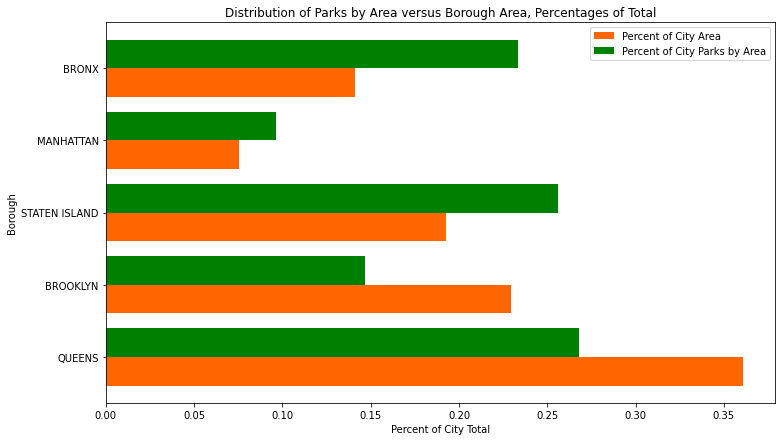

<Figure size 432x288 with 0 Axes>

In [286]:
X = park_distr['borough']
Yarea = park_distr['percent_city_area']
Zpark_area = park_distr['area_parks_percent']
  
Y_axis = np.arange(len(X))
  
plt.figure(figsize = (12,7))
plt.barh(Y_axis - 0.2, Yarea, 0.4, label = 'Percent of City Area', color = ny_orange)
plt.barh(Y_axis + 0.2, Zpark_area, 0.4, label = 'Percent of City Parks by Area', color = 'g')
  
plt.yticks(Y_axis, X)
plt.ylabel("Borough")
plt.xlabel("Percent of City Total")
plt.title("Distribution of Parks by Area versus Borough Area, Percentages of Total")
plt.legend()
plt.show()

plt.tight_layout()
plt.savefig('images/park_distr_area.png');

## By Park Number

In [168]:
park_distr

,borough,area_degsq,percent_city_area,num_parks_percent,area_parks_percent
0,QUEENS,0.030098,0.361062,0.234975,0.267835
1,BROOKLYN,0.019130,0.229491,0.302463,0.146581
2,STATEN ISLAND,0.016044,0.192463,0.078818,0.255932
3,MANHATTAN,0.006309,0.075685,0.190148,0.096326
4,BRONX,0.011779,0.141298,0.193596,0.233326


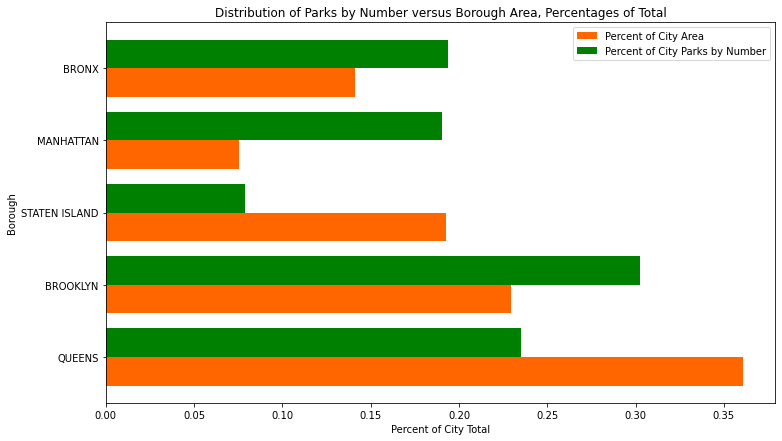

<Figure size 432x288 with 0 Axes>

In [287]:
X = park_distr['borough']
Yarea = park_distr['percent_city_area']
Zpark_area = park_distr['num_parks_percent']
  
Y_axis = np.arange(len(X))
  
plt.figure(figsize = (12,7))
plt.barh(Y_axis - 0.2, Yarea, 0.4, label = 'Percent of City Area', color = ny_orange)
plt.barh(Y_axis + 0.2, Zpark_area, 0.4, label = 'Percent of City Parks by Number', color = 'g')
  
plt.yticks(Y_axis, X)
plt.ylabel("Borough")
plt.xlabel("Percent of City Total")
plt.title("Distribution of Parks by Number versus Borough Area, Percentages of Total")
plt.legend()
plt.show()

plt.tight_layout()
plt.savefig('images/park_distr_num.png');

In [170]:
boroughs

,borough,percent_of_tot_permits,percent_of_tot_outlier_complaints,complaints_percent_diff,closest_park_mean
0,BROOKLYN,0.305977,0.277778,-0.092163,0.115663
1,QUEENS,0.288979,0.072650,-0.748599,0.216910
2,STATEN ISLAND,0.264177,0.021368,-0.919117,0.154760
3,BRONX,0.101853,0.318376,2.125835,0.102130
4,MANHATTAN,0.039014,0.309829,6.941583,0.076853



get the area of borough and these park areas into the same data frame, combine them, etc.

# Permit Proximity to Parks
I created a set of randomly distributed points throughout the city, 1_000 in each borough. I eliminated those points that fell in parks (which happened at roughly the distribution one would expect based on area) and looked at the mean distance to closest park for those random points at both the city and the borough level.

I think this is a good proxy for evaluating whether or not permits are falling where expected relative to parks, but for further detail, one could examine how the proximity of parks at the .1, .5, 1, and 2.5 mile distances compares to the random points.

It's also worth noting that the random points could be falling in places where residential buildings can't be built even after eliminating parks. If that's because the point is in a street, there would be an address close enough that the distance to closest park should be roughly the same. If the points are falling in non-residential zoned areas, subjectively it's still a valuable metric, as how to zone an area is a political choice that affects the availability of areas to housing. In other words, a polity could opt that those locations should be available for housing and a change in the relatively proximity of housing (in one direction or the other) to parks based on that decision would be appropriately reflected in the analysis.

# **Note to Self**
**The rank function is in roughly this place in my backup notebook.**
**The code to create an image from a table is also in roughly the same place.**

# Generating Random Points to See what We'd Expect For Closest Park

## Note: Skip Following Steps to Replicate Analysis with Same Random Points
The random points I used for my analysis are saved in the data folder as 'analysis_fivek_random_points.csv'. If you'd like to replicate my analysis more exactly, please skip the following steps and import that, below. I've noted where to pick up to use the same random points used in my analysis

In [12]:
minx, miny, maxx, maxy = boroughs_shapes[0].bounds

In [351]:
borough_bounds.head()

,the_geom,borocode,borough,shape_leng,shape_area,area_degsq,tot_park_area_degsq,tot_park_perim_deg
0,MULTIPOLYGON (((-73.82644661516991 40.59052744...,4,QUEENS,900269.280485,3.040206e+09,0.030098,0.003370,0.009018
1,MULTIPOLYGON (((-73.86327471071958 40.58387684...,3,BROOKLYN,728477.954082,1.934167e+09,0.019130,0.001844,0.011607
2,MULTIPOLYGON (((-74.05050806403247 40.56642203...,5,STATEN ISLAND,325924.002076,1.623631e+09,0.016044,0.003220,0.003025
3,MULTIPOLYGON (((-74.01092841268031 40.68449147...,1,MANHATTAN,359993.126318,6.366208e+08,0.006309,0.001212,0.007297
4,MULTIPOLYGON (((-73.89680883223778 40.79580844...,2,BRONX,463868.599917,1.187194e+09,0.011779,0.002936,0.007430


In [358]:
random_points = []
for i in range(5):
    count = 0
    while count <1000:
        xmin, ymin, xmax, ymax = boroughs_shapes[i].bounds
        name = borough_bounds['borough'][i].upper()
        x = random.uniform(xmin, xmax)
        y = random.uniform(ymin, ymax)
        if Point(x, y).within(boroughs_shapes[i]):
            count +=1
            item = [name, x, y]
            random_points.append(item)

In [359]:
random_points = pd.DataFrame(random_points, columns = ['borough', 'longitude', 'latitude'])

In [360]:
random_points.shape

(5000, 3)

In [222]:
# I saved the random points I used for my analysis at this point, before eliminating any of them, in order to ease reproducing my analysis.
#random_points.to_csv('data/analysis_fivek_random_points.csv', index = False)

## Pick Up Here to Follow Using the Random Points I used from my analysis

In [223]:
# import the random points used in analysis here:
#random_points = pd.read_csv('data/analysis_fivek_random_points.csv')

In [197]:
variables['random_points'] = ['dataframe', 'contains the random points used to compare to permits and their data']

In [225]:
random_points['point'] = ''

In [226]:
random_points['in_park'] = 0

In [227]:
random_points.head()

,borough,longitude,latitude,point,in_park
0,QUEENS,-73.854893,40.782480,,0
1,QUEENS,-73.893860,40.755288,,0
2,QUEENS,-73.817751,40.719254,,0
3,QUEENS,-73.824702,40.771634,,0
4,QUEENS,-73.863832,40.773887,,0


In [228]:
for i in random_points.index:
    random_points.loc[i, 'point'] = shapely.geometry.Point(random_points.loc[i, 'longitude'], random_points.loc[i, 'latitude'])

/Users/lorendunn/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/managers.py:304: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  applied = getattr(b, f)(**kwargs)


In [229]:
t0 = time.time()

for i in range(len(parks)):
    print(i)
    t1 = time.time()
    shape = shapely.wkt.loads(parks.loc[i,'multipolygon'])
    minx, miny, maxx, maxy = shape.bounds
    bounding_box = shapely.geometry.box(minx, miny, maxx, maxy)
    for n in random_points.index:
        if random_points.loc[n, 'in_park'] == 0:
            point = random_points.loc[n, 'point']
            if bounding_box.contains(point):
                if shape.contains(point):
                    random_points.loc[n, 'in_park'] = 1
    print(f"Time from start to end of {i} loop: {time.time()-t0}")
    print(f"Time to run the {i} loop: {time.time()-t1}")
    print('')
print(f"Total time: {time.time()-t0}")

0
Time from start to end of 0 loop: 0.09527230262756348
Time to run the 0 loop: 0.09433698654174805

1
Time from start to end of 1 loop: 0.16008925437927246
Time to run the 1 loop: 0.06474804878234863

2
Time from start to end of 2 loop: 0.22674012184143066
Time to run the 2 loop: 0.06656599044799805

3
Time from start to end of 3 loop: 0.29309630393981934
Time to run the 3 loop: 0.06636381149291992

4
Time from start to end of 4 loop: 0.35778212547302246
Time to run the 4 loop: 0.06462287902832031

5
Time from start to end of 5 loop: 0.42322731018066406
Time to run the 5 loop: 0.06538581848144531

6
Time from start to end of 6 loop: 0.48870134353637695
Time to run the 6 loop: 0.06550717353820801

7
Time from start to end of 7 loop: 0.5525293350219727
Time to run the 7 loop: 0.06373906135559082

8
Time from start to end of 8 loop: 0.616901159286499
Time to run the 8 loop: 0.06435489654541016

9
Time from start to end of 9 loop: 0.6831941604614258
Time to run the 9 loop: 0.0662741661071

In [230]:
random_points.head()

,borough,longitude,latitude,point,in_park
0,QUEENS,-73.854893,40.782480,POINT (-73.85489261102316 40.78248031228739),0
1,QUEENS,-73.893860,40.755288,POINT (-73.89386045158598 40.75528778868644),0
2,QUEENS,-73.817751,40.719254,POINT (-73.81775077819175 40.71925356635326),0
3,QUEENS,-73.824702,40.771634,POINT (-73.82470248869488 40.77163421976302),0
4,QUEENS,-73.863832,40.773887,POINT (-73.86383157649665 40.77388735309459),0


In [231]:
random_points.shape

(5000, 5)

In [232]:
random_points['in_park'].value_counts()

0    4253
1     747
Name: in_park, dtype: int64

## Proportion In Parks
Parks make up 15.1% of the area of the city. 14.9% of my random points fell into parks. That represent a difference of 1.0%.

In [233]:
percent_parks_random = random_points['in_park'].value_counts(normalize = True)[1]
percent_parks_random

0.1494

In [234]:
percent_parks_city = tot_parks_area/park_distr['area_degsq'].sum()
percent_parks_city

0.15094590140511654

In [235]:
(percent_parks_random - percent_parks_city)/percent_parks_city

-0.010241426833893081

### Dropping the Points that Fell in Parks

In [236]:
random_points.shape

(5000, 5)

In [237]:
random_points = random_points[random_points['in_park']==0]

In [238]:
random_points.shape

(4253, 5)

### Calculating Proximity to Parks of Random Points

In [239]:
parks_shapes = shape_list(parks['multipolygon'])

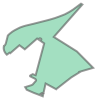

In [240]:
parks_shapes[0]

#### Distance Estimator
This is the same distance estimator I used in engineering the permits data frame. It's worth acknowledging it's imprecision here, as well. Distance is calculated in terms of degrees, both longitude and latitude. However, a degree of longitude is ~40 miles at the latitude of New York City, whereas a degree of latitude is ~69 miles. I've averaged these two values for an estimate of 54.5 miles/degree of distance. It's a rough estimator, but seems to be the best option for now.

This is one point at which further refinement could be achieved, by using a more involved method to calculate distance. It would theoretically be possible to identify the closest point on the parks perimeter and then use the distance function to calculate a more precise distance that takes longitude and latitude into account.

In [241]:
t0 = time.time()

for i in random_points.index:
    t1 = time.time()
    print(f'Permit {i} started.')
    point = random_points.loc[i, 'point']
    close_park = 99999
    for n in range(0, len(parks_shapes)):
        distance = point.distance(parks_shapes[n])*54.5
        if distance < close_park:
            close_park = distance
    random_points.loc[i, 'closest_park'] = close_park
    print(f"Point {i} finished at {time.time()}, after {time.time()-t1}, {time.time()-t0} since the start of index {i}.")
print(f'Time to complete code: {time.time()-t0}') 

Permit 0 started.
Point 0 finished at 1660487550.653353, after 0.19224810600280762, 0.19307208061218262 since the start of index 0.
Permit 1 started.
Point 1 finished at 1660487550.661481, after 0.008105993270874023, 0.20119714736938477 since the start of index 1.
Permit 2 started.


/var/folders/5_/498w081d1837cc82dmb4hwmc0000gn/T/ipykernel_937/2715717279.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random_points.loc[i, 'closest_park'] = close_park


Point 2 finished at 1660487550.6699278, after 0.00841212272644043, 0.20964813232421875 since the start of index 2.
Permit 3 started.
Point 3 finished at 1660487550.678406, after 0.008396148681640625, 0.21812725067138672 since the start of index 3.
Permit 4 started.
Point 4 finished at 1660487550.6870599, after 0.008555173873901367, 0.22678017616271973 since the start of index 4.
Permit 5 started.
Point 5 finished at 1660487550.6951199, after 0.007966041564941406, 0.23483705520629883 since the start of index 5.
Permit 6 started.
Point 6 finished at 1660487550.702941, after 0.007781982421875, 0.24265813827514648 since the start of index 6.
Permit 7 started.
Point 7 finished at 1660487550.7107708, after 0.007730960845947266, 0.2504870891571045 since the start of index 7.
Permit 8 started.
Point 8 finished at 1660487550.718545, after 0.007740974426269531, 0.25826096534729004 since the start of index 8.
Permit 9 started.
Point 9 finished at 1660487550.726327, after 0.007745027542114258, 0.2

In [242]:
random_points.head()

,borough,longitude,latitude,point,in_park,closest_park
0,QUEENS,-73.854893,40.782480,POINT (-73.85489261102316 40.78248031228739),0,0.181282
1,QUEENS,-73.893860,40.755288,POINT (-73.89386045158598 40.75528778868644),0,0.224269
2,QUEENS,-73.817751,40.719254,POINT (-73.81775077819175 40.71925356635326),0,0.140586
3,QUEENS,-73.824702,40.771634,POINT (-73.82470248869488 40.77163421976302),0,0.123754
4,QUEENS,-73.863832,40.773887,POINT (-73.86383157649665 40.77388735309459),0,0.329029


## Distance from Parks
### City as a Whole
The mean distance from the closest park for the actual permits is about -4% less than would be expected based on the random points.

In [243]:
random_points['closest_park'].mean()

0.15871838413245587

In [244]:
permits['closest_park'].mean()

0.1523573087510188

In [293]:
(permits['closest_park'].mean()-random_points['closest_park'].mean())/random_points['closest_park'].mean()

-0.0400777478690089

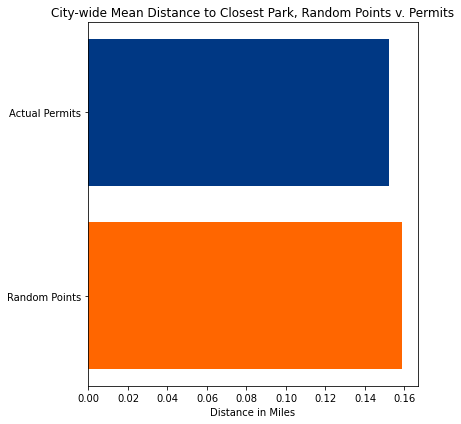

In [292]:
plt.figure(figsize = (6, 6))
plt.title('City-wide Mean Distance to Closest Park, Random Points v. Permits')
plt.xlabel('Distance in Miles')
plt.barh(['Random Points', 'Actual Permits'], 
        [random_points['closest_park'].mean(), permits['closest_park'].mean()], 
        color = [ny_orange, ny_blue])
plt.tight_layout()
plt.savefig('images/city_parks_rando_actual.png');

### By Borough
On the borough level, the permits are markedly closer to parks than would be expected from the random points:

- BRONX % diff: -0.2038105479526765
- BROOKLYN % diff: -0.2970757108286061
- MANHATTAN % diff: -0.1742046908593089
- QUEENS % diff: -0.08342249723682413
- STATEN ISLAND % diff: -0.048738080572025104

This is a positive sign, but warrants more research before drawing a conclusion. Ideally, one would use zoning data and eliminate random points that fall outside residential zoning. That would indicate whether new housing is being randomly distributed in residential zones or if the distribution leans towards or away from proximity to parks.

#### Important Note
The percent differences by borough don't line up with the city-wide percent differences because of the different representation of boroughs in the random points versus the actual permits: in the random permits, the points were evenly distributed across the boroughs before elimination of parks, and after elimination of points that landed in parks, they were still around 20% each. The permits are not evenly distributed around the city, however.

In [308]:
print(f"Random point distribution by borough (after eliminating parks): \n{random_points['borough'].value_counts(normalize = True)}")
print(f"Permits distribution by borough: \n{permits['borough'].value_counts(normalize = True)}")

Random point distribution by borough (after eliminating parks): 
BROOKLYN         0.217258
QUEENS           0.212791
MANHATTAN        0.198918
STATEN ISLAND    0.189043
BRONX            0.181989
Name: borough, dtype: float64
Permits distribution by borough: 
BROOKLYN         0.305977
QUEENS           0.288979
STATEN ISLAND    0.264177
BRONX            0.101853
MANHATTAN        0.039014
Name: borough, dtype: float64


In [245]:
random_points.groupby('borough')['closest_park'].mean()

borough
BRONX            0.128274
BROOKLYN         0.164546
MANHATTAN        0.093065
QUEENS           0.236653
STATEN ISLAND    0.162689
Name: closest_park, dtype: float64

In [304]:
sum(random_points.groupby('borough')['closest_park'].mean().to_list())/5

0.15704511872778795

In [246]:
permits.groupby('borough')['closest_park'].mean()

borough
BRONX            0.102130
BROOKLYN         0.115663
MANHATTAN        0.076853
QUEENS           0.216910
STATEN ISLAND    0.154760
Name: closest_park, dtype: float64

In [305]:
sum(permits.groupby('borough')['closest_park'].mean().to_list())/5

0.13326317711680707

In [277]:
boro_names = list(permits['borough'].unique())
boro_names = sorted(boro_names)
boro_names

['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND']

In [268]:
variables['boro_names'] = ['list', 'names of the boroughs']

In [269]:
keys = random_points.groupby('borough')['closest_park'].mean().keys().to_list()
values = random_points.groupby('borough')['closest_park'].mean().to_list()

rando_mean_park = dict(zip(keys, values))
rando_mean_park

{'BRONX': 0.12827368662564836,
 'BROOKLYN': 0.164545731762308,
 'MANHATTAN': 0.09306501240798559,
 'QUEENS': 0.23665250193847231,
 'STATEN ISLAND': 0.16268866090452547}

In [271]:
variables['rando_mean_park'] = ['dictionary', 'mean closest park by borough for random points']

In [279]:
keys = permits.groupby('borough')['closest_park'].mean().keys().to_list()
values = permits.groupby('borough')['closest_park'].mean().to_list()

permit_mean_park = dict(zip(keys, values))
permit_mean_park

{'BRONX': 0.10213015626656506,
 'BROOKLYN': 0.1156631915352072,
 'MANHATTAN': 0.07685265069163472,
 'QUEENS': 0.2169103592494226,
 'STATEN ISLAND': 0.15475952784120584}

In [280]:
variables['permit_mean_park'] = ['dictionary', 'mean closest park by borough for permits']

In [298]:
for name in boro_names: 
    print(f"{name} % diff: {(permit_mean_park[name]-rando_mean_park[name])/rando_mean_park[name]}")

BRONX % diff: -0.2038105479526765
BROOKLYN % diff: -0.2970757108286061
MANHATTAN % diff: -0.1742046908593089
QUEENS % diff: -0.08342249723682413
STATEN ISLAND % diff: -0.048738080572025104


In [281]:
rando_pk_dist = []
for name in boro_names:
    rando_pk_dist.append(rando_mean_park[name])
rando_pk_dist

[0.12827368662564836,
 0.164545731762308,
 0.09306501240798559,
 0.23665250193847231,
 0.16268866090452547]

In [282]:
perm_pk_dist = []
for name in boro_names:
    perm_pk_dist.append(permit_mean_park[name])
perm_pk_dist

[0.10213015626656506,
 0.1156631915352072,
 0.07685265069163472,
 0.2169103592494226,
 0.15475952784120584]

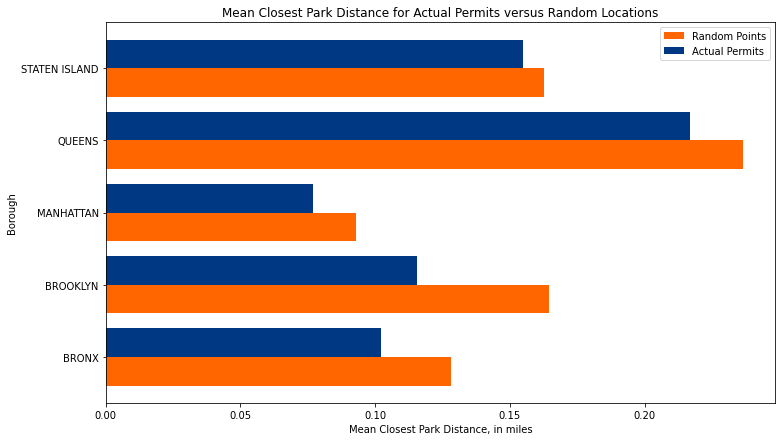

<Figure size 432x288 with 0 Axes>

In [309]:
X = boro_names
Y = rando_pk_dist
Z = perm_pk_dist
  
Y_axis = np.arange(len(X))
  
plt.figure(figsize = (12,7))
plt.barh(Y_axis - 0.2, Y, 0.4, label = 'Random Points', color = ny_orange)
plt.barh(Y_axis + 0.2, Z, 0.4, label = 'Actual Permits', color = ny_blue)
  
plt.yticks(Y_axis, X)
plt.ylabel("Borough")
plt.xlabel("Mean Closest Park Distance, in miles")
plt.title("Mean Closest Park Distance for Actual Permits versus Random Locations")
plt.legend()
plt.show()

plt.tight_layout()
plt.savefig('images/boros_parks_rando_actual.png');

# Historic Districts
I used the random points to check the rate of location in historic districts. I could compare rate of permits to the percent of area represented by historical districts, but would need to remove parks. The random points already account for the parks, thus presenting a viable alternative.

In [310]:
random_points['in_hist_dist'] = 0

/var/folders/5_/498w081d1837cc82dmb4hwmc0000gn/T/ipykernel_937/3902917073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random_points['in_hist_dist'] = 0


In [311]:
historic_dists = pd.read_csv('../historic_districts/LPC_HD_OpenData_2015Nov.csv')

In [312]:
variables['historic_districts'] = ['dataframe', 'data on historic districts']

In [313]:
historic_dists.columns

Index(['the_geom', 'BOROUGH', 'LP_NUMBER', 'CURRENT_', 'AREA_NAME',
       'EXTENSION', 'STATUS_OF_', 'LAST_ACTIO', 'BOUNDARY_N', 'PUBLIC_HEA',
       'OTHER_HEAR', 'DESDATE', 'CALDATE', 'Shape_Leng', 'Shape_Area'],
      dtype='object')

In [314]:
historic_dists.columns = historic_dists.columns.str.lower()

In [315]:
historic_dists.head()

,the_geom,borough,lp_number,current_,area_name,extension,status_of_,last_actio,boundary_n,public_hea,other_hear,desdate,caldate,shape_leng,shape_area
0,MULTIPOLYGON (((-73.78070476564865 40.79368791...,QN,LP-02040,Yes,Fort Totten Historic District,No,DESIGNATED,DESIGNATED,NaN,5/4/1999,NaN,6/29/1999,4/13/1999,11203.199722,4.067523e+06
1,MULTIPOLYGON (((-73.9545180987722 40.781621828...,MN,LP-01985,Yes,Hardenbergh/Rhinelander Historic District,No,DESIGNATED,DESIGNATED,NaN,3/10/1998,NaN,5/5/1998,NaN,410.860307,1.065242e+04
2,MULTIPOLYGON (((-74.00855983447059 40.71123470...,MN,LP-01901,Yes,African Burial Ground & The Commons Historic D...,No,DESIGNATED,DESIGNATED,NaN,9/1/1992,NaN,2/25/1993,NaN,4995.471462,1.069203e+06
3,MULTIPOLYGON (((-73.9595480661095 40.648261608...,BK,LP-00989,Yes,Albemarle-Kenmore Terraces Historic District,No,DESIGNATED,DESIGNATED,NaN,1/10/1978,NaN,7/11/1978,NaN,1240.770438,7.854686e+04
4,MULTIPOLYGON (((-73.96103396183 40.65868182663...,BK,LP-02567,Yes,Chester Court Historic District,No,DESIGNATED,DESIGNATED,AS IDENTIFIED BY RESEARCH DEPARTMENT (AND DETE...,11/25/2014,NaN,12/16/2014,10/28/2014,803.900855,3.840307e+04


In [316]:
t0 = time.time()

for i in range(len(historic_dists)):
    print(i)
    t1 = time.time()
    shape = shapely.wkt.loads(historic_dists['the_geom'][i])
    minx, miny, maxx, maxy = shape.bounds
    bounding_box = shapely.geometry.box(minx, miny, maxx, maxy)
    for n in random_points.index:
        if random_points.loc[n, 'in_hist_dist'] == 0:
            point = random_points.loc[n, 'point']
            if bounding_box.contains(point):
                if shape.contains(point):
                    random_points.loc[n, 'in_hist_dist'] = 1
    print(f"Time from start to end of {i} loop: {time.time()-t0}")
    print(f"Time to run the {i} loop: {time.time()-t1}")
    print('')
print(f"Total time: {time.time()-t0}")

0
Time from start to end of 0 loop: 0.09378790855407715
Time to run the 0 loop: 0.09272885322570801

1
Time from start to end of 1 loop: 0.15389108657836914
Time to run the 1 loop: 0.060028791427612305

2
Time from start to end of 2 loop: 0.21552109718322754
Time to run the 2 loop: 0.06165909767150879

3
Time from start to end of 3 loop: 0.2783339023590088
Time to run the 3 loop: 0.06277108192443848

4
Time from start to end of 4 loop: 0.33907604217529297
Time to run the 4 loop: 0.06071186065673828

5
Time from start to end of 5 loop: 0.399982213973999
Time to run the 5 loop: 0.06087231636047363

6
Time from start to end of 6 loop: 0.4643971920013428
Time to run the 6 loop: 0.06443595886230469

7
Time from start to end of 7 loop: 0.5251929759979248
Time to run the 7 loop: 0.06073403358459473

8
Time from start to end of 8 loop: 0.5874948501586914
Time to run the 8 loop: 0.06228303909301758

9
Time from start to end of 9 loop: 0.6483981609344482
Time to run the 9 loop: 0.060884952545166

In [317]:
random_points.head()

,borough,longitude,latitude,point,in_park,closest_park,in_hist_dist
0,QUEENS,-73.854893,40.782480,POINT (-73.85489261102316 40.78248031228739),0,0.181282,0
1,QUEENS,-73.893860,40.755288,POINT (-73.89386045158598 40.75528778868644),0,0.224269,0
2,QUEENS,-73.817751,40.719254,POINT (-73.81775077819175 40.71925356635326),0,0.140586,0
3,QUEENS,-73.824702,40.771634,POINT (-73.82470248869488 40.77163421976302),0,0.123754,0
4,QUEENS,-73.863832,40.773887,POINT (-73.86383157649665 40.77388735309459),0,0.329029,0


## City-Wide Rates of Permits in Historic Districts
As expected, the rate of permits in historic districts (.6%) is 84.8% lower than the rate among the randomly distributed points(3.9%). This is, of course, one of the purposes of a historic district, but it's worth considering when we look at building more housing in NYC. In particular, why are the districts located where they are? Do they contribute to inequity in housing opportunities?

### Point for Further Examination
It might be worth looking at the proportion of the city encompassed by historic districts to get a more precise sense of the scale at which the districts are diminishing potential housing stock. That said, the rate at which random points fall in historic districts, at least by borough, gives us a good approzimation.

In [318]:
random_points['in_hist_dist'].value_counts(normalize = True)

0    0.961439
1    0.038561
Name: in_hist_dist, dtype: float64

In [319]:
permits['in_hist_dist'].value_counts(normalize = True)

0    0.994148
1    0.005852
Name: in_hist_dist, dtype: float64

In [323]:
(permits['in_hist_dist'].value_counts(normalize = True)[1]- random_points['in_hist_dist'].value_counts(normalize = True)[1])/random_points['in_hist_dist'].value_counts(normalize = True)[1]


-0.8482398039808738

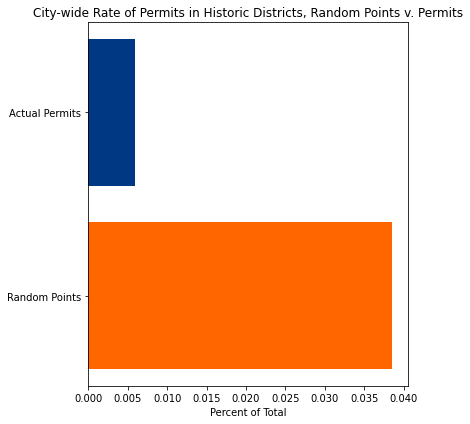

In [325]:
plt.figure(figsize = (6, 6))
plt.title('City-wide Rate of Permits in Historic Districts, Random Points v. Permits')
plt.xlabel('Percent of Total')
plt.barh(['Random Points', 'Actual Permits'], 
        [random_points['in_hist_dist'].value_counts(normalize = True)[1], permits['in_hist_dist'].value_counts(normalize = True)[1]], 
        color = [ny_orange, ny_blue])
plt.tight_layout()
plt.savefig('images/city_historical_rando_actual.png');


## Rates of Location in Historical District by Borough

BRONX % diff: -0.8941176470588236
BROOKLYN % diff: -0.7725594446905922
MANHATTAN % diff: -0.5467857142857143
QUEENS % diff: -0.7090967534554805
STATEN ISLAND % diff: -1.0

#### Important Note
The percent differences by borough don't line up with the city-wide percent differences because of the different representation of boroughs in the random points versus the actual permits: in the random permits, the points were evenly distributed across the boroughs before elimination of parks, and after elimination of points that landed in parks, they were still around 20% each. The permits are not evenly distributed around the city, however.

In [320]:
random_points.groupby('borough')['in_hist_dist'].value_counts(normalize = True)[:, 1]

borough
BRONX            0.012920
BROOKLYN         0.040043
MANHATTAN        0.118203
QUEENS           0.009945
STATEN ISLAND    0.009950
Name: in_hist_dist, dtype: float64

In [321]:
permits.groupby('borough')['in_hist_dist'].value_counts(normalize = True)[:, 1]

borough
BRONX        0.001368
BROOKLYN     0.009107
MANHATTAN    0.053571
QUEENS       0.002893
Name: in_hist_dist, dtype: float64

In [330]:
keys = random_points.groupby('borough')['in_hist_dist'].mean().keys().to_list()
values = random_points.groupby('borough')['in_hist_dist'].mean().to_list()

rando_historic = dict(zip(keys, values))
rando_historic

{'BRONX': 0.012919896640826873,
 'BROOKLYN': 0.04004329004329004,
 'MANHATTAN': 0.1182033096926714,
 'QUEENS': 0.009944751381215469,
 'STATEN ISLAND': 0.009950248756218905}

In [331]:
variables['rando_historic'] = ['dictionary', 'rates of random points falling in historic districs by borough']

In [332]:
keys = permits.groupby('borough')['in_hist_dist'].mean().keys().to_list()
values = permits.groupby('borough')['in_hist_dist'].mean().to_list()

permit_historic = dict(zip(keys, values))
permit_historic

{'BRONX': 0.0013679890560875513,
 'BROOKLYN': 0.009107468123861567,
 'MANHATTAN': 0.05357142857142857,
 'QUEENS': 0.0028929604628736743,
 'STATEN ISLAND': 0.0}

In [333]:
variables['permit_historic'] = ['dictionary', 'rates of permits in historic districts by borough']

In [334]:
for name in boro_names: 
    print(f"{name} % diff: {(permit_historic[name]-rando_historic[name])/rando_historic[name]}")

BRONX % diff: -0.8941176470588236
BROOKLYN % diff: -0.7725594446905922
MANHATTAN % diff: -0.5467857142857143
QUEENS % diff: -0.7090967534554805
STATEN ISLAND % diff: -1.0


In [335]:
rando_historic_dist = []
for name in boro_names:
    rando_historic_dist.append(rando_historic[name])
rando_historic_dist

[0.012919896640826873,
 0.04004329004329004,
 0.1182033096926714,
 0.009944751381215469,
 0.009950248756218905]

In [337]:
perm_historic_dist = []
for name in boro_names:
    perm_historic_dist.append(permit_historic[name])
perm_historic_dist

[0.0013679890560875513,
 0.009107468123861567,
 0.05357142857142857,
 0.0028929604628736743,
 0.0]

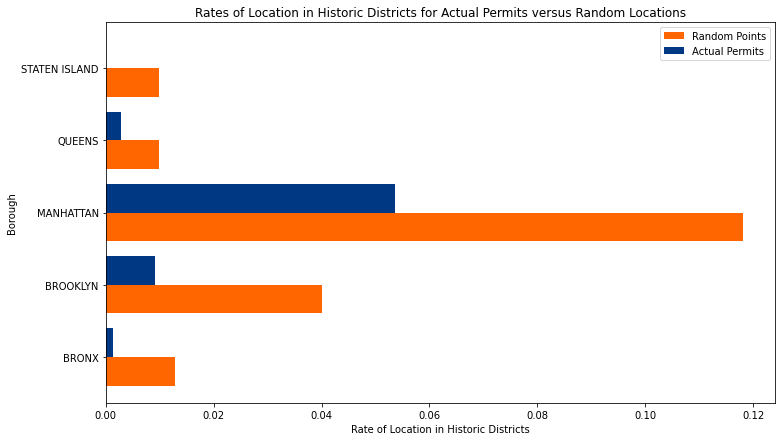

<Figure size 432x288 with 0 Axes>

In [338]:
X = boro_names
Y = rando_historic_dist
Z = perm_historic_dist
  
Y_axis = np.arange(len(X))
  
plt.figure(figsize = (12,7))
plt.barh(Y_axis - 0.2, Y, 0.4, label = 'Random Points', color = ny_orange)
plt.barh(Y_axis + 0.2, Z, 0.4, label = 'Actual Permits', color = ny_blue)
  
plt.yticks(Y_axis, X)
plt.ylabel("Borough")
plt.xlabel("Rate of Location in Historic Districts")
plt.title("Rates of Location in Historic Districts for Actual Permits versus Random Locations")
plt.legend()
plt.show()

plt.tight_layout()
plt.savefig('images/boros_historic_rando_actual.png');

# HERE!!!!
## PICK UP HERE!!!


### Add the actual rates of historic districts by borough to the boroughs dataframe

In [339]:
boroughs

,borough,percent_of_tot_permits,percent_of_tot_outlier_complaints,complaints_percent_diff,closest_park_mean
0,BROOKLYN,0.305977,0.277778,-0.092163,0.115663
1,QUEENS,0.288979,0.072650,-0.748599,0.216910
2,STATEN ISLAND,0.264177,0.021368,-0.919117,0.154760
3,BRONX,0.101853,0.318376,2.125835,0.102130
4,MANHATTAN,0.039014,0.309829,6.941583,0.076853


In [468]:
boroughs.loc[0, 'area_degsq']-borough_bounds.loc[(borough_bounds['borough']== 'MANHATTAN'), 'tot_park_area_degsq']

3    0.017918
Name: tot_park_area_degsq, dtype: float64

In [467]:
boroughs.loc[i, 'area_minus_parks_degsq']

0

In [464]:
boroughs['area_minus_parks_degsq'] = 0

In [493]:
borough_bounds[borough_bounds['borough'] == 'MANHATTAN'].index

Int64Index([3], dtype='int64')

In [ ]:
borough_bounds.loc

In [492]:
borough_bounds.loc[(borough_bounds[borough_bounds['borough'] == 'MANHATTAN'].index), 'tot_park_area_degsq']

0.0012120541090715222

In [496]:
borough_bounds.loc[3, 'tot_park_area_degsq']

0.0012120541090715222

In [508]:
borough

'MANHATTAN'

In [530]:
boroughs.head()

,borough,percent_of_tot,high_complaints_percent,complaints_percent_diff,closest_park_mean,city_park_area_degsq_percent,city_park_perim_deg_percent,closest_park_rank,city_park_area_rank,city_park_perim_rank,area_degsq,area_rank,city_area_percent,area_minus_parks_degsq
0,BROOKLYN,0.305977,0.277778,-0.092163,0.115663,0.146581,0.302463,3,4,1,0.019130,2,0.229491,NaN
1,QUEENS,0.288979,0.072650,-0.748599,0.216910,0.267835,0.234975,5,1,2,0.030098,1,0.361062,NaN
2,STATEN ISLAND,0.264177,0.021368,-0.919117,0.154760,0.255932,0.078818,4,2,5,0.016044,3,0.192463,NaN
3,BRONX,0.101853,0.318376,2.125835,0.102130,0.233326,0.193596,2,3,3,0.011779,4,0.141298,NaN
4,MANHATTAN,0.039014,0.309829,6.941583,0.076853,0.096326,0.190148,1,5,4,0.006309,5,0.075685,NaN


In [548]:
boroughs['tot_park_area_degsq'] = 0

In [555]:
for i in parks.index:
    shape = shapely.wkt.loads(parks.loc[i, 'multipolygon'])
    area = shape.area
    boroughs.loc[(boroughs['borough'] == parks.loc[i, 'borough']), 'tot_park_area_degsq'] = boroughs.loc[boroughs['borough'] == parks.loc[i, 'borough'], 'tot_park_area_degsq']+area


Something is wrong because it's saying the bronx is almost entirely park.

In [575]:
parks.head()

,address,borough,name311,objectid,zipcode,multipolygon
0,132 ALTAMONT STREET,STATEN ISLAND,High Rock Park,69247,1030410306,MULTIPOLYGON (((-74.12362180687407 40.58475747...
1,2539 PITKIN AVENUE,BROOKLYN,Manley's Pl,5274,11208,MULTIPOLYGON (((-73.87857041022092 40.67475246...
2,none,QUEENS,Park,6413,11414,MULTIPOLYGON (((-73.8471858043584 40.669606352...
3,225 JORALEMON STREET,BROOKLYN,Columbus Park,5062,11201,MULTIPOLYGON (((-73.98911885717008 40.69492270...
4,400 EAST 188 STREET,BRONX,Webster Playground,4764,10458,MULTIPOLYGON (((-73.89239779472493 40.85937697...


In [576]:
parks[parks['borough']== 'BRONX']

,address,borough,name311,objectid,zipcode,multipolygon
4,400 EAST 188 STREET,BRONX,Webster Playground,4764,10458,MULTIPOLYGON (((-73.89239779472493 40.85937697...
10,none,BRONX,Soundview Park,6210,10473,MULTIPOLYGON (((-73.86982410310259 40.81679170...
11,750 COURTLANDT AVENUE,BRONX,P.S. 29 Ballfield,6428,10451,MULTIPOLYGON (((-73.91665189609022 40.82143889...
14,none,BRONX,Whalen Grove,5669,10457,MULTIPOLYGON (((-73.88586966839269 40.85094610...
15,765 MANIDA STREET,BRONX,Julio Carballo Fields,5311,10474,MULTIPOLYGON (((-73.8890124322292 40.816439899...
...,...,...,...,...,...,...
1999,902 CAULDWELL AVENUE,BRONX,Dunbar Playground,5727,10456,MULTIPOLYGON (((-73.9059191265952 40.823253724...
2003,1750 BURKE AVENUE,BRONX,Haffen Park,4705,10469,MULTIPOLYGON (((-73.83763290069393 40.87331371...
2007,none,BRONX,Matthews Muliner Playground,5538,10462,MULTIPOLYGON (((-73.86105361973188 40.84673077...
2014,2700 BAILEY AVENUE,BRONX,Riverbend Playground,6663,1046310468,MULTIPOLYGON (((-73.90524044430829 40.87240952...


In [584]:
bronx_parks = parks[parks['borough']== 'BRONX']

In [585]:
bronx_parks['area'] = 0

/var/folders/5_/498w081d1837cc82dmb4hwmc0000gn/T/ipykernel_1125/1809847592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bronx_parks['area'] = 0


In [588]:
bronx_parks.head()

,address,borough,name311,objectid,zipcode,multipolygon,area
4,400 EAST 188 STREET,BRONX,Webster Playground,4764,10458,MULTIPOLYGON (((-73.89239779472493 40.85937697...,3.457754e-07
10,none,BRONX,Soundview Park,6210,10473,MULTIPOLYGON (((-73.86982410310259 40.81679170...,1.161808e-04
11,750 COURTLANDT AVENUE,BRONX,P.S. 29 Ballfield,6428,10451,MULTIPOLYGON (((-73.91665189609022 40.82143889...,4.782550e-07
14,none,BRONX,Whalen Grove,5669,10457,MULTIPOLYGON (((-73.88586966839269 40.85094610...,5.278414e-08
15,765 MANIDA STREET,BRONX,Julio Carballo Fields,5311,10474,MULTIPOLYGON (((-73.8890124322292 40.816439899...,1.449964e-06


In [587]:
for i in bronx_parks.index:
    shape = shapely.wkt.loads(bronx_parks.loc[i, 'multipolygon'])
    area = shape.area
    bronx_parks.loc[i, 'area'] = area

/var/folders/5_/498w081d1837cc82dmb4hwmc0000gn/T/ipykernel_1125/7126890.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bronx_parks.loc[i, 'area'] = area


In [589]:
bronx_parks['area'].sum()

0.002935890095524689

In [ ]:
THE BRONX VALUE IN THE BOROUGHS TABLE IS MESSED UP.

# PRetty sure the belwo is bad, though maybe soe notes

In [572]:
boroughs.head()

,borough,percent_of_tot,high_complaints_percent,complaints_percent_diff,closest_park_mean,city_park_area_degsq_percent,city_park_perim_deg_percent,closest_park_rank,city_park_area_rank,city_park_perim_rank,area_degsq,area_rank,city_area_percent,area_minus_parks_degsq,tot_park_area_degsq,area_minus_parks_percent
0,BROOKLYN,0.305977,0.277778,-0.092163,0.115663,0.146581,0.302463,3,4,1,0.019130,2,0.229491,0.011753,0.007378,0.355836
1,QUEENS,0.288979,0.072650,-0.748599,0.216910,0.267835,0.234975,5,1,2,0.030098,1,0.361062,0.016618,0.013480,0.503129
2,STATEN ISLAND,0.264177,0.021368,-0.919117,0.154760,0.255932,0.078818,4,2,5,0.016044,3,0.192463,0.003162,0.012881,0.095745
3,BRONX,0.101853,0.318376,2.125835,0.102130,0.233326,0.193596,2,3,3,0.011779,4,0.141298,0.000035,0.011744,0.001060
4,MANHATTAN,0.039014,0.309829,6.941583,0.076853,0.096326,0.190148,1,5,4,0.006309,5,0.075685,0.001461,0.004848,0.044230


In [558]:
boroughs['area_minus_parks_degsq'] = 0

In [560]:
boroughs['area_minus_parks_degsq'] = boroughs['area_degsq']-boroughs['tot_park_area_degsq']

In [566]:
boroughs['area_minus_parks_percent'] = 0

In [568]:
city_nonpark_area = boroughs['area_minus_parks_degsq'].sum()
city_nonpark_area

0.033028471433729625

In [571]:
for i in boroughs.index:
    boroughs.loc[i, 'area_minus_parks_percent'] = boroughs.loc[i, 'area_minus_parks_degsq']/city_nonpark_area

In [573]:
permits['borough'].value_counts(normalize = True)

BROOKLYN         0.305977
QUEENS           0.288979
STATEN ISLAND    0.264177
BRONX            0.101853
MANHATTAN        0.039014
Name: borough, dtype: float64

In [574]:
boroughs[['borough', 'area_minus_parks_percent']]

,borough,area_minus_parks_percent
0,BROOKLYN,0.355836
1,QUEENS,0.503129
2,STATEN ISLAND,0.095745
3,BRONX,0.001060
4,MANHATTAN,0.044230


In [543]:
boroughs

,borough,percent_of_tot,high_complaints_percent,complaints_percent_diff,closest_park_mean,city_park_area_degsq_percent,city_park_perim_deg_percent,closest_park_rank,city_park_area_rank,city_park_perim_rank,area_degsq,area_rank,city_area_percent,area_minus_parks_degsq,tot_park_area_degsq,area_minus_parks_percent
0,BROOKLYN,0.305977,0.277778,-0.092163,0.115663,0.146581,0.302463,3,4,1,0.019130,2,0.229491,0,0.001844,NaN
1,QUEENS,0.288979,0.072650,-0.748599,0.216910,0.267835,0.234975,5,1,2,0.030098,1,0.361062,0,0.003370,NaN
2,STATEN ISLAND,0.264177,0.021368,-0.919117,0.154760,0.255932,0.078818,4,2,5,0.016044,3,0.192463,0,0.003220,NaN
3,BRONX,0.101853,0.318376,2.125835,0.102130,0.233326,0.193596,2,3,3,0.011779,4,0.141298,0,0.002936,NaN
4,MANHATTAN,0.039014,0.309829,6.941583,0.076853,0.096326,0.190148,1,5,4,0.006309,5,0.075685,0,0.001212,NaN


In [511]:
borough_bounds

,the_geom,borocode,borough,shape_leng,shape_area,area_degsq,tot_park_area_degsq,tot_park_perim_deg
0,MULTIPOLYGON (((-73.82644661516991 40.59052744...,4,QUEENS,900269.280485,3.040206e+09,0.030098,0.003370,0.009018
1,MULTIPOLYGON (((-73.86327471071958 40.58387684...,3,BROOKLYN,728477.954082,1.934167e+09,0.019130,0.001844,0.011607
2,MULTIPOLYGON (((-74.05050806403247 40.56642203...,5,STATEN ISLAND,325924.002076,1.623631e+09,0.016044,0.003220,0.003025
3,MULTIPOLYGON (((-74.01092841268031 40.68449147...,1,MANHATTAN,359993.126318,6.366208e+08,0.006309,0.001212,0.007297
4,MULTIPOLYGON (((-73.89680883223778 40.79580844...,2,BRONX,463868.599917,1.187194e+09,0.011779,0.002936,0.007430


In [520]:
 borough_bounds.loc[borough_bounds.loc[borough_bounds['borough'] == 'MANHATTAN'].index, 'the_geom']

3    MULTIPOLYGON (((-74.01092841268031 40.68449147...
Name: the_geom, dtype: object

In [ ]:
borough_bounds['burough'] == index_borough

In [529]:
borough_bounds.loc[0, 'borocode']

4

In [526]:
borough_bounds.dtypes

the_geom                object
borocode                 int64
borough                 object
shape_leng             float64
shape_area             float64
area_degsq             float64
tot_park_area_degsq    float64
tot_park_perim_deg     float64
dtype: object

In [525]:
for i in boroughs.index:
    index_borough = boroughs.loc[i, 'borough']
    print(index_borough)
    parks_area = borough_bounds[borough_bounds['borough'] == index_borough]['tot_park_area_degsq']
    print('Parks_area', parks_area)

BROOKLYN
Parks_area 1    0.001844
Name: tot_park_area_degsq, dtype: float64
QUEENS
Parks_area 0    0.00337
Name: tot_park_area_degsq, dtype: float64
STATEN ISLAND
Parks_area 2    0.00322
Name: tot_park_area_degsq, dtype: float64
BRONX
Parks_area 4    0.002936
Name: tot_park_area_degsq, dtype: float64
MANHATTAN
Parks_area 3    0.001212
Name: tot_park_area_degsq, dtype: float64


In [518]:
for i in boroughs.index:
    index_borough = boroughs.loc[i, 'borough']
    boro_area = boroughs.loc[i, 'area_degsq']
    index = borough_bounds.loc[borough_bounds['borough'] == index_borough].index
    print('Index is:', index)
    boro_parks = borough_bounds.loc[borough_bounds['borough'] == index_borough, 'tot_park_area_degsq']
    print(boro_area)
    print(boro_parks)
    boro_less_parks = boro_area - boro_parks
    print(type(boro_less_parks))
    boroughs.loc[i, 'area_minus_parks_degsq'] = boro_less_parks
    boro_area - boro_parks

Index is: Int64Index([1], dtype='int64')
0.019130333943754674
1    0.001844
Name: tot_park_area_degsq, dtype: float64
<class 'pandas.core.series.Series'>


ValueError: Incompatible indexer with Series

In [504]:
boroughs.head()

,borough,percent_of_tot,high_complaints_percent,complaints_percent_diff,closest_park_mean,city_park_area_degsq_percent,city_park_perim_deg_percent,closest_park_rank,city_park_area_rank,city_park_perim_rank,area_degsq,area_rank,city_area_percent,area_minus_parks_degsq
0,BROOKLYN,0.305977,0.277778,-0.092163,0.115663,0.146581,0.302463,3,4,1,0.019130,2,0.229491,NaN
1,QUEENS,0.288979,0.072650,-0.748599,0.216910,0.267835,0.234975,5,1,2,0.030098,1,0.361062,NaN
2,STATEN ISLAND,0.264177,0.021368,-0.919117,0.154760,0.255932,0.078818,4,2,5,0.016044,3,0.192463,NaN
3,BRONX,0.101853,0.318376,2.125835,0.102130,0.233326,0.193596,2,3,3,0.011779,4,0.141298,NaN
4,MANHATTAN,0.039014,0.309829,6.941583,0.076853,0.096326,0.190148,1,5,4,0.006309,5,0.075685,NaN


I have precinct data in the original permits database (99%) and can match on job_no